<a href="https://colab.research.google.com/github/lelyashashlyk/DataScienceLearning/blob/main/numpy/image_norm_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Библиотеки и функции

In [ ]:
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

def white_balance(arr):
  plt.subplots(figsize=(5, 2))
  sns.kdeplot(arr[:,:,0].ravel(), color='red')
  sns.kdeplot(arr[:,:,1].ravel(), color='green')
  sns.kdeplot(arr[:,:,2].ravel(), color='blue')

def rebalance(arr, y_min, y_max):
  return arr * ((y_max-y_min)/y_max) + y_min

def show_image(list_: list) -> Image.Image:
  return Image.fromarray(np.array(list_, dtype = np.uint8))

import ipywidgets as widgets
from IPython.display import display, clear_output
slider_r = widgets.FloatSlider(
    value=0,
    min=0,
    max=255,
    step=1,
    description='Красный:'
)
slider_g = widgets.FloatSlider(
    value=0,
    min=0,
    max=255,
    step=1,
    description='Зеленый:'
)
slider_b = widgets.FloatSlider(
    value=0,
    min=0,
    max=255,
    step=1,
    description='Синий:'
)

def update_rgb_image(r_value, g_value, b_value):
    width, height = 200, 200
    rgb_image = np.zeros((height, width, 3), dtype=np.uint8)

    r = int(r_value)
    g = int(g_value)
    b = int(b_value)

    rgb_image[:, :, 0] = r
    rgb_image[:, :, 1] = g
    rgb_image[:, :, 2] = b

    image = Image.fromarray(rgb_image)

    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    plt.title(f'RGB изображение')
    plt.axis('off')
    plt.show()


out = widgets.Output()


def on_slider_change(change):
    r_value = slider_r.value
    g_value = slider_g.value
    b_value = slider_b.value

    with out:
        clear_output(wait=True)
        update_rgb_image(r_value, g_value, b_value)

# RGB


In [ ]:
image = Image.open('alaarcha.png')
image


Мы загрузили картинку `600x900` и прочитали ее с помощью библиотеки `PIL`. Любое изображение, с точки зрения данных, представляет собой числовой массив, который может быть представлен в виде числовой таблицы или матрицы, где каждый элемент кодирует тот или иной пиксель. Но есть, как говорится, нюанс! В случае, когда наша картинка цветная, чаще всего она может быть представлена в виде трех матриц, или трехмерной матрицы, каждая из которых кодирует один из трех каналов:

* R - красный
* G - зеленый
* B - синий

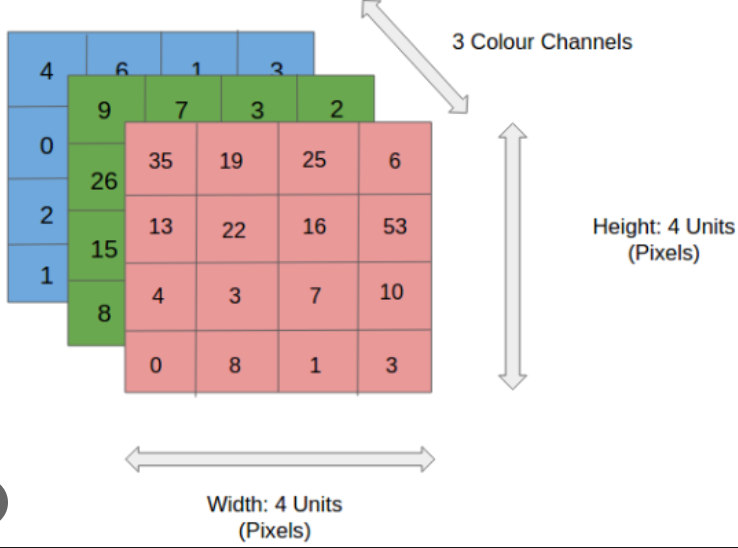

Если мы говорим о 8-ми битной кодировке, то в каждом канале каждый пиксель может принимать целые значение от 0 до 255. Это значение показывает интенсивность (яркость) цвета для одного из каналов RGB или яркость белого для ЧБ изображения (одноканального). Как известно, чтобы закодировать число 256 в двоичном виде - нулями и единицами, нужно 8 знаков. Поэтому мы говорим о 8-мибитном изображении.

Ниже дан калькулятор RGB. Поиграйтесь им!

In [ ]:
slider_r.observe(on_slider_change, 'value')
slider_g.observe(on_slider_change, 'value')
slider_b.observe(on_slider_change, 'value')
display(widgets.VBox([slider_r, slider_g, slider_b]))
display(out)

# image to numpy

In [ ]:
rgb = np.array(image)
rgb.shape

Посмотрим на каждый канал отдельно с помощью функции show_image()

In [ ]:
show_image(rgb)

# ЧБ

Мы посмотрели на изображение каждого канала. Мы увидели, что один канал будет всегда интерпретироваться как черно-белое изображение, но все полученные картинки немного отличаются между собой, а поэтому считать каждое изображение самостоятельным не очень правильно.

Подумайте, как из трех матриц для каждого канала сделать одну, которая будет интерпретироваться как полноценное черно-белое изображение?

Сохраните полученный числовой массив в переменную `bw`.

In [ ]:
bw = rgb[:,:,0]*.3 + rgb[:,:,1]*.59 + rgb[:,:,2]*.11
show_image(bw)

# Нормализация изображения

Давайте оценим среднее, минимум и максимум интенсивности каждого цвета (каждого канала).

In [ ]:
rgb[:,:,0].mean()

In [ ]:
white_balance(rgb)

Попробуем нормализовать изображение, чтобы сбалансировать цвета

In [ ]:
norm1 = ((rgb - rgb.min(axis=(0,1))*255)/(rgb.max(axis=(0,1))*255 - rgb.min(axis=(0,1))*255))
white_balance(norm1)

In [ ]:
norm1 = ((rgb - rgb.min(axis=(0,1)))/(rgb.max(axis=(0,1)) - rgb.min(axis=(0,1))))
white_balance(norm1)

In [ ]:
show_image(norm1*255)